## 1. Setup and Data Acquisition

In [2]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns

ModuleNotFoundError: No module named 'statsmodels'

In [4]:
# Download Apple Inc. (AAPL) stock data
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Reset the index to use the 'Date' column properly
stock_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


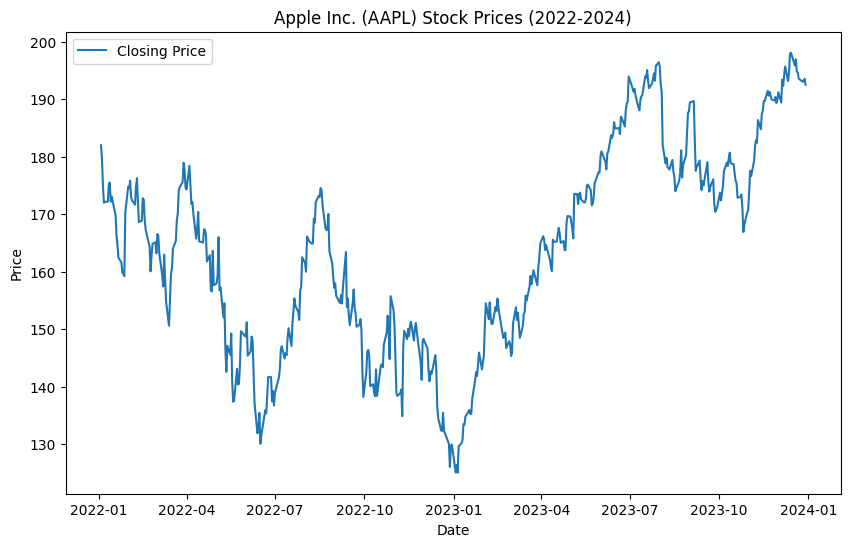

In [5]:
# Plot the stock price to visualize trends
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price')
plt.title('Apple Inc. (AAPL) Stock Prices (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 2. Model Building
(a) Linear Regression Using Rolling Averages
- Feature Engineering: Create rolling averages (e.g., 7-day and 30-day) to act as predictors.
- Train/Test Split: Split the data into training and testing sets.
- Train Model: Use linear regression to predict the stock price.

In [7]:
# Create rolling averages as features
stock_data['7_day_avg'] = stock_data['Close'].rolling(window=7).mean()
stock_data['30_day_avg'] = stock_data['Close'].rolling(window=30).mean()

In [8]:
# Drop rows with NaN values caused by rolling averages
stock_data = stock_data.dropna()

In [9]:
# Define features (X) and target (y)
X = stock_data[['7_day_avg', '30_day_avg']]
y = stock_data['Close']

In [10]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions
y_pred_linear = lin_reg.predict(X_test)

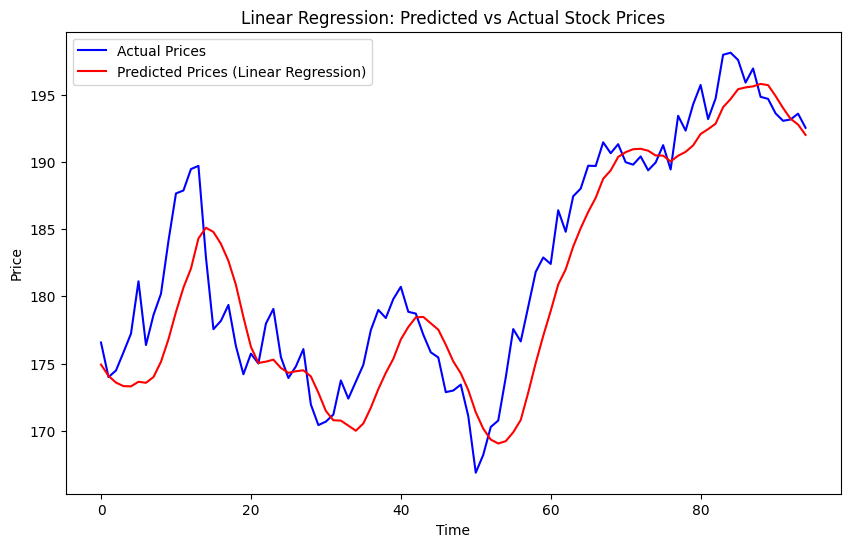

In [13]:
# Visualize the prediction vs. actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred_linear, label='Predicted Prices (Linear Regression)', color='red')
plt.title('Linear Regression: Predicted vs Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

(b) Exponential Smoothing Model
- Data Preparation: Use only the closing price as input for the Exponential Smoothing model.
- Train Model: Use the Holt-Winters Exponential Smoothing model to predict the stock price.

In [15]:
# Train-test split (80% train, 20% test)
train_size = int(len(stock_data) * 0.8)
train_data = stock_data['Close'][:train_size]
test_data = stock_data['Close'][train_size:]

In [19]:
# Create and fit the Exponential Smoothing model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_smoothing_model = ExponentialSmoothing(train_data, seasonal='add', trend='add', seasonal_periods=30)
fitted_model = exp_smoothing_model.fit()

C:\Users\RISHABH RATHORE\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [20]:
# Forecast the next values
y_pred_exp = fitted_model.forecast(len(test_data))

C:\Users\RISHABH RATHORE\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\RISHABH RATHORE\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


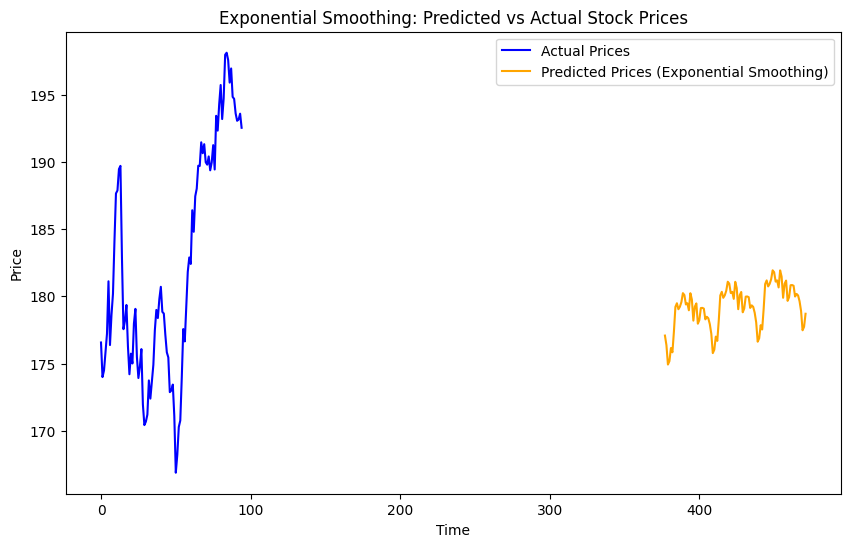

In [21]:
# Visualize the prediction vs. actual
plt.figure(figsize=(10, 6))
plt.plot(test_data.values, label='Actual Prices', color='blue')
plt.plot(y_pred_exp, label='Predicted Prices (Exponential Smoothing)', color='orange')
plt.title('Exponential Smoothing: Predicted vs Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## 3. Performance Metrics
- Calculate MAE, MSE, and RMSE for each model.
- Compare Performance to determine which model performs better.

In [23]:
# Calculate performance metrics for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

In [24]:
# Calculate performance metrics for Exponential Smoothing
mae_exp = mean_absolute_error(test_data, y_pred_exp)
mse_exp = mean_squared_error(test_data, y_pred_exp)
rmse_exp = np.sqrt(mse_exp)

In [25]:
# Print the performance metrics
print('Performance Metrics:')
print('Linear Regression:')
print(f'MAE: {mae_linear:.2f}, MSE: {mse_linear:.2f}, RMSE: {rmse_linear:.2f}')
print('\nExponential Smoothing:')
print(f'MAE: {mae_exp:.2f}, MSE: {mse_exp:.2f}, RMSE: {rmse_exp:.2f}')

Performance Metrics:
Linear Regression:
MAE: 2.87, MSE: 12.88, RMSE: 3.59

Exponential Smoothing:
MAE: 6.98, MSE: 74.04, RMSE: 8.60


## 4. Model Comparison and Interpretation
1. Visualize forecasted vs. actual values using a combined plot for both models.
2. Interpret Results to understand the better-performing model.
3. Discuss Real-World Implications for finance and investment.

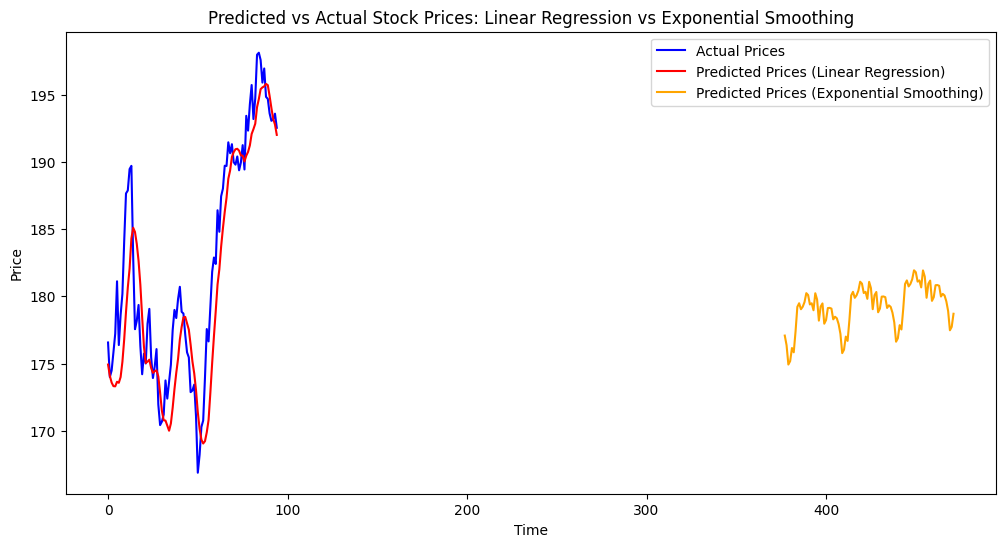

In [26]:
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(test_data.values, label='Actual Prices', color='blue')

# Plot predicted values from Linear Regression
plt.plot(y_pred_linear, label='Predicted Prices (Linear Regression)', color='red')

# Plot predicted values from Exponential Smoothing
plt.plot(y_pred_exp, label='Predicted Prices (Exponential Smoothing)', color='orange')

plt.title('Predicted vs Actual Stock Prices: Linear Regression vs Exponential Smoothing')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()